In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import aseegg as ag
import numpy as np
import ast
import copy
import statistics

In [2]:
df = pd.read_csv('moje_dane_kot2.txt',names = ['signal','time'])

In [3]:
# wycięcie słowa "start" z sygnału
# zamiana typu zmiennej sygnału na floaty

signal = df[df.signal != 'start']['signal'].astype(float)

In [4]:
length = len(signal)
t = np.linspace(0, length/200, length)

Text(0, 0.5, 'Apmlituda [uV]')

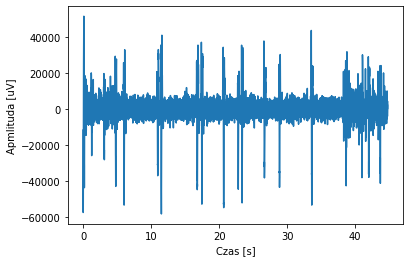

In [5]:
# Cały sygnał

plt.plot(t, signal)
plt.xlabel('Czas [s]')
plt.ylabel('Apmlituda [uV]')

Text(0, 0.5, 'Apmlituda [uV]')

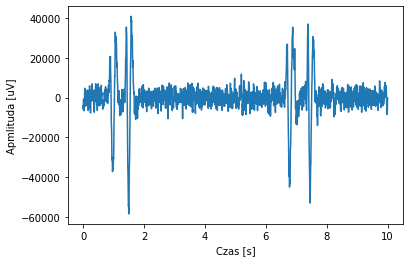

In [6]:
# 10-sekundowy fragment
t2 = np.linspace(0,10,2000)

plt.plot(t2, signal[2000:4000])
plt.xlabel('Czas [s]')
plt.ylabel('Apmlituda [uV]')

In [7]:
with open('czasy_kot2.txt') as f:
    lines = f.read().splitlines()
t0 = int(lines[1])
timetable = ast.literal_eval(lines[3])
delay_timetable = ast.literal_eval(lines[5])

In [8]:
#sztucznie zwiekszamy probkowanie do 1 na 1ms by przefiltrowac sygnal pod katem czasow
signal1=[]
for x in signal:
    signal1.extend([x]*5)
signal_ext = list(signal1)

In [9]:
#t0+1000
start = t0+1000
signal1.insert(0,[0]*start)

In [10]:
for x in delay_timetable:
    l = x[1]-x[0]
    signal1[x[0]:x[1]] = [0]*l

0


Text(0, 0.5, 'Apmlituda [uV]')

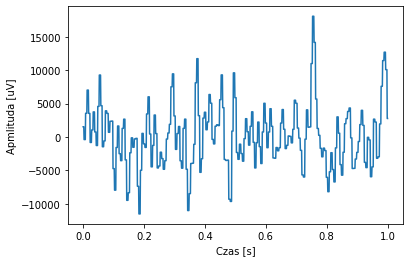

In [11]:
#SZUKANIE LITER
t2 = np.linspace(0,1,1000)
c = 'a'
i = ord(c)-97
print(i)
plt.plot(t2, signal1[timetable[i][0]:timetable[i][0]+1000])
plt.xlabel('Czas [s]')
plt.ylabel('Apmlituda [uV]')

Text(0, 0.5, 'Apmlituda [uV]')

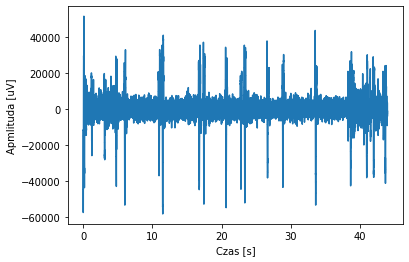

In [12]:
#CALY
s0 = 0
s = 44
t2 = np.linspace(s0,s,(s-s0)*1000)

plt.plot(t2, signal_ext[s0*1000:s*1000])
plt.xlabel('Czas [s]')
plt.ylabel('Apmlituda [uV]')

Text(0, 0.5, 'Apmlituda [uV]')

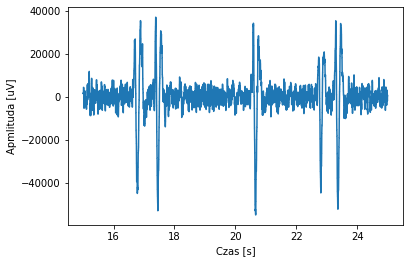

In [13]:
#FRAGMENT
s0 = 15
s = 25
t2 = np.linspace(s0,s,(s-s0)*1000)

plt.plot(t2, signal_ext[s0*1000:s*1000])
plt.xlabel('Czas [s]')
plt.ylabel('Apmlituda [uV]')

In [14]:
#pks=[]
#i = 0
#for x in signal1:
#    if x<-40000:
#        pks.append(i)
#    i += 1

In [15]:
letters = set()
#for x in pks:
#    i = 0
#    for y in timetable:
#        if x>y[0] and x<y[1]:
#            letters.add(chr(97+(i%27)))
#        i += 1

In [16]:
letters

set()

In [17]:
#start zaczyna sie na t0 + 1000

In [18]:
signal_fin = copy.deepcopy(signal_ext)
len(signal_ext)

44755

In [19]:
#korekta
timetable_list = []
delay_timetable_list = []
delay = 3000

for x in timetable:
    timetable_list.append((x[0]+delay,x[1]+delay))

for x in delay_timetable:
    delay_timetable_list.append((x[0]+delay,x[1]+delay))

In [20]:
delay_timetable_list

[(4258, 6258),
 (10258, 12258),
 (16259, 18259),
 (22258, 24259),
 (28259, 30259),
 (34258, 36259)]

In [21]:
#dodatkowe opoznienie 3s + 1s zwiazana z cyklem wywolan
#eventu w pygame + 0.25 t0
#pomiar zaczynamy wiec od 4.25: poczatku pierwszego odliczania
#po poprawce +3s

In [22]:
for i in range(len(signal_fin)):
    if i < delay_timetable_list[0][0]:
        signal_fin[i] = 0
    else:
        for x in delay_timetable_list:
            if i > x[0] and i < x[1]:
                signal_fin[i] = 0

In [23]:
signal_fin = signal_fin[0:delay_timetable_list[-1][1]]
print(len(signal_fin))

36259


Text(0, 0.5, 'Apmlituda [uV]')

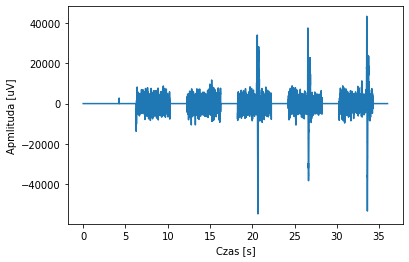

In [24]:
#CALY
s0 = 0
s = 36
t2 = np.linspace(s0,s,(s-s0)*1000)

plt.plot(t2, signal_fin[s0*1000:s*1000])
plt.xlabel('Czas [s]')
plt.ylabel('Apmlituda [uV]')

Text(0, 0.5, 'Apmlituda [uV]')

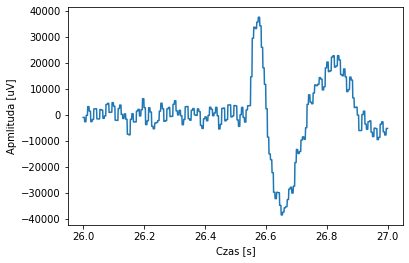

In [25]:
#FRAGMENT
s0 = 26
s = 27
t2 = np.linspace(s0,s,(s-s0)*1000)

plt.plot(t2, signal_fin[s0*1000:s*1000])
plt.xlabel('Czas [s]')
plt.ylabel('Apmlituda [uV]')

In [26]:
delay_timetable_list

[(4258, 6258),
 (10258, 12258),
 (16259, 18259),
 (22258, 24259),
 (28259, 30259),
 (34258, 36259)]

In [27]:
timetable_list

[(6258, 7258),
 (7259, 8257),
 (8258, 9257),
 (9258, 10258),
 (12258, 13258),
 (13259, 14258),
 (14260, 15259),
 (15260, 16259),
 (18259, 19258),
 (19259, 20258),
 (20259, 21258),
 (21259, 22258),
 (24259, 25258),
 (25259, 26259),
 (26260, 27259),
 (27259, 28259),
 (30259, 31258),
 (31259, 32258),
 (32259, 33258),
 (33259, 34258),
 (36259, 37259)]

In [28]:
#sposob 1 prosty
letters = set()
a = []
b = []
for i in range(len(signal_fin)):
    if signal_fin[i] > 20000:
        a.append(signal_fin[i])
        b.append(i)
        for j in range(len(timetable_list)):
            if i>timetable_list[j][0] and i<timetable_list[j][1]:
                letters.add(chr(97+j))

In [29]:
letters

{'k', 'o', 't'}

In [30]:
#sposob 2 z uzyciem usrednych wartosci sygnalu dla litery - oddzielnie dodatnich i ujemnych,
#a następnie porownywanie ich z ogolna srednia dodatnia i ujemna.
#w przypadku spelnienia obu warunkow litera dopisywana jest do listy
#metoda ta jest wiarygodniejsza dla roznie zaszumionych sygnalow - selekcja odbywa się na bazie usrednionych,
#a nie suchych wartosci

meanpos = 0
sumpos = 0
lenpos = 0

meanneg = 0
sumneg = 0
lenneg = 0

for x in signal_fin:
    if x>0:
        sumpos += x
        lenpos += 1
    elif x<0:
        sumneg += x
        lenneg += 1
meanpos = sumpos/lenpos
meanneg = sumneg/lenneg

In [31]:
mean_list = []
meanposl = 0
meannegl = 0

for t in timetable_list[:-1]:
    sumposl = 0
    sumnegl = 0
    lenposl = 0
    lennegl = 0
    for x in signal_fin[t[0]:t[1]]:
        if x>0:
            sumposl += x
            lenposl += 1
        elif x<0:
            sumnegl += x
            lennegl += 1
    meanposl = sumposl/lenposl
    meannegl = sumnegl/lennegl
    mean_list.append((meanposl,meannegl))

In [32]:
letters2 = []
for x in range(len(mean_list)):
    if mean_list[x][0]>meanpos and mean_list[x][1]<meanneg:
        letters2.append(chr(97+x))

In [33]:
letters2

['k', 'o', 't']

In [34]:
#sposob 3: szukamy charakterystycznego ksztaltu amplitudy - silnego wzrostu wiekszego niz przecietne odchylenie dodatnie(t+50ms),
#po ktorym nastepuje silny spadek wiekszy niz przecietne odchylenie ujemne(t+150ms), po ktorym ponownie obserwujemy
#silny wzrost sygnalu(t+300)
#w kwestii optymalizacji skupilismy sie rowniez na tym sposobie, gdyz wydaje sie najbardziej odporny na przypadkowe wykrycia
#jednoczesnie wymagajac mniej operacji iteracji po zbiorze - po znalezieniu wzrostu sprawdzamy czy wystepuje spadek i ponowny
#wzrost w okreslonych odstepach, w przypadku znalezienia go przeskakujemy do nastepnej litery

In [61]:
a = 0
letters3 = []

for t in timetable_list[:-1]:
    found = False
    i = t[0]
    while i < t[1]:
        if signal_fin[i] > 1.5*meanpos:
            if signal_fin[i+150-15] < 1.5*meanneg:
                if signal_fin[i+300-15] > 1.5*meanpos:
                    letters3.append(chr(97+a))
                    break
        i += 1
    a += 1

In [62]:
print(letters3)

['k', 'o', 't']


In [63]:
#zeby nie polegac na pojedynczych wartosciach mozemy skonstruowac wokol oczekiwanych szczytow wzrostu i spadku
#przedzialy +-10s i porownywac tak otrzymane srednie
#odejmujemy od wartosci rowniez 15ms, gdyz zakladamy ze dopiero po takim czasie od t zdarzenia nastapi
#wykrycie wzrostu x1.5 wzgledem sredniej

In [64]:
a = 0
letters4 = []

for t in timetable_list[:-1]:
    found = False
    i = t[0]
    while i < t[1]:
        if signal_fin[i] > 1.5*meanpos:
            if sum(signal_fin[i+125:i+145])/20 < 1.5*meanneg: #wszystko -15 i do tego przedzial +-10 a wiec 135+-10  285+-10
                if sum(signal_fin[i+275:i+295])/20 > 1.5*meanpos:
                    letters4.append(chr(97+a))
                    break
        i += 1
    a += 1

In [65]:
letters4

['k', 'o', 't']